In [29]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [30]:
df = pd.read_csv('petdata.csv')

In [31]:
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [39]:
df = df.drop('Id', axis=1)

The mean is:
38.03904358353511
The Standard Deviation is:
20.591990105774546
The Spread is:
424.03005651631685
The Mode is:
0    28
1    30
dtype: int64
The Tail is:
9907    15
9908    70
9909    20
9910    20
9911    30
Name: Pawpularity, dtype: int64


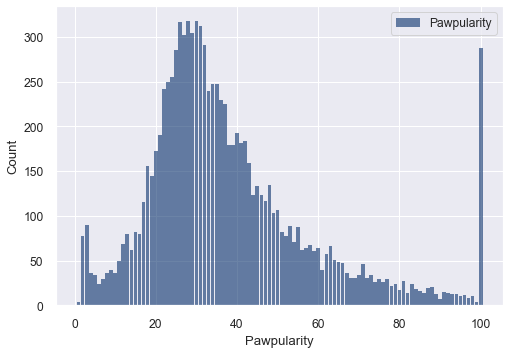

In [33]:
hist = thinkstats2.Hist(df.Pawpularity, label='Pawpularity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Pawpularity', ylabel='Count')

mean = df.Pawpularity.mean()
std = df.Pawpularity.std()
var = df.Pawpularity.var()
mode = df.Pawpularity.mode()
tail = df.Pawpularity.tail()



print("The mean is:")
print(mean)

print("The Standard Deviation is:")
print(std)

print("The Spread is:")
print(var)

print("The Mode is:")
print(mode)

print("The Tail is:")
print(tail)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

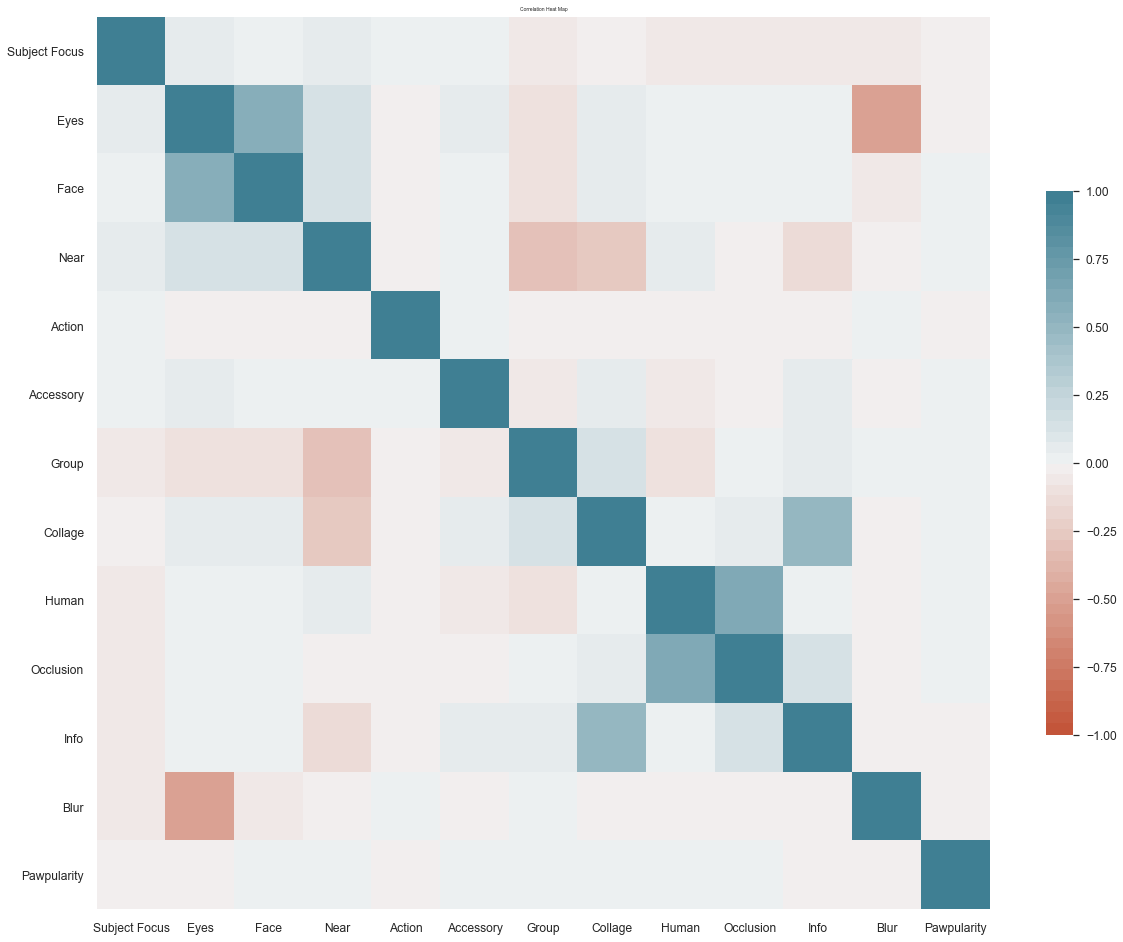

In [35]:
corr = df.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.1)
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 5)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X=df.drop(['Pawpularity'],axis=1)
y=df['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=123)

In [44]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

In [45]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  20.897090175110698


In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)

In [47]:
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  20.62366157175567
Train RMSE for Linear Regression is  20.549882028157867
Variance for Linear Regression is  0.07377954359780148
